In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from warnings import filterwarnings ; filterwarnings('ignore')

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [11]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [13]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Remove duplicates
df = df.drop_duplicates()


In [17]:
# Check missing values
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [19]:
# Recalculate Total Amount (to verify data correctness)
df['Total Amount Check'] = df['Quantity'] * df['Price per Unit']

In [21]:
# Create Month-Year column
df['Month_Year'] = df['Date'].dt.to_period('M')

In [23]:
# Age Groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18','19-30','31-45','46-60','60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [31]:
# Total Revenue
total_revenue = df['Total Amount'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 456000


In [35]:
# Total Transactions
total_transactions = df['Transaction ID'].nunique()
print("Total Transactions:", total_transactions)

Total Transactions: 1000


In [37]:
# Total Customers
total_customers = df['Customer ID'].nunique()
print("Total Customers:", total_customers)

Total Customers: 1000


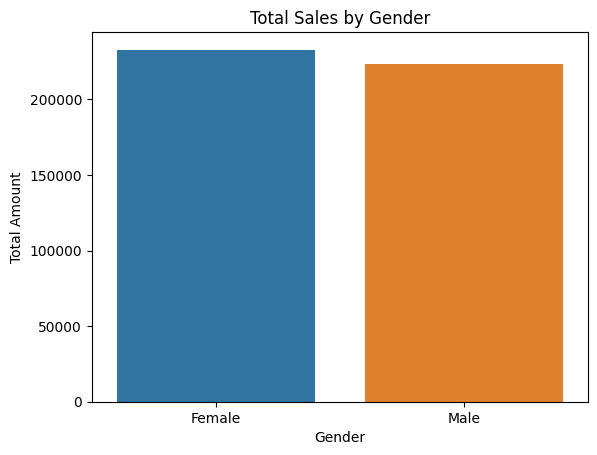

In [39]:
## Sales by gender

gender_sales = df.groupby('Gender')['Total Amount'].sum().reset_index()
sns.barplot(data=gender_sales, x='Gender', y='Total Amount')
plt.title("Total Sales by Gender")
plt.show()


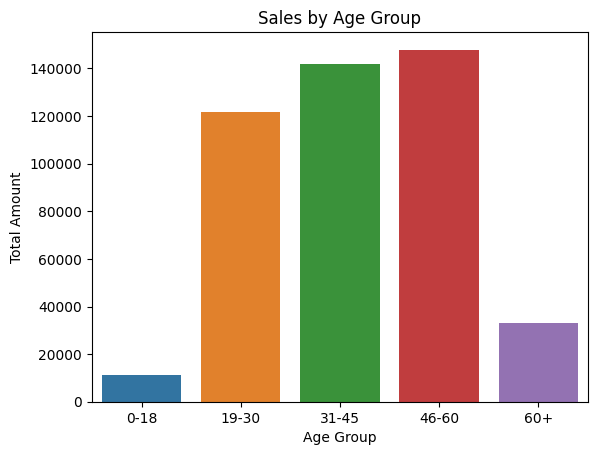

In [41]:
## Sales by age group 

age_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()
sns.barplot(data=age_sales, x='Age Group', y='Total Amount')
plt.title("Sales by Age Group")
plt.show()


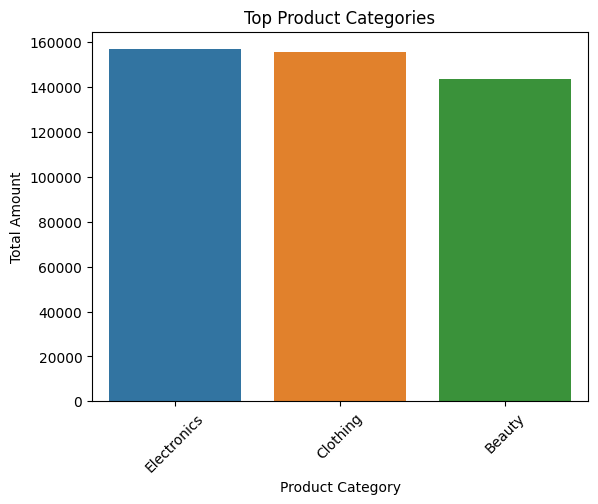

In [45]:
## Top product categories

category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=category_sales, x='Product Category', y='Total Amount')
plt.title("Top Product Categories")
plt.xticks(rotation=45)
plt.show()


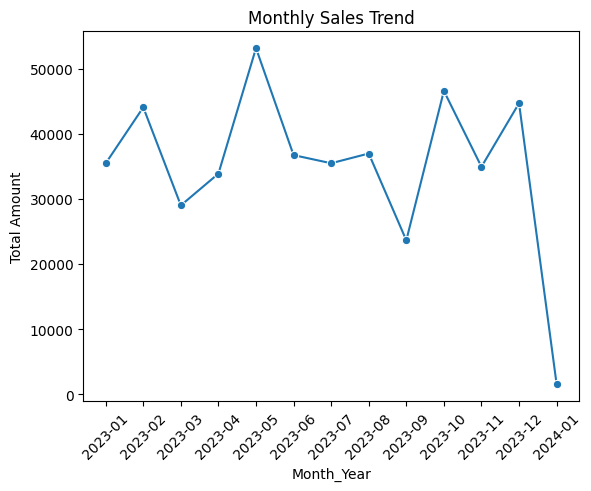

In [47]:
## Monthly Sales Trend

monthly_sales = df.groupby('Month_Year')['Total Amount'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype(str)

sns.lineplot(data=monthly_sales, x='Month_Year', y='Total Amount', marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.show()


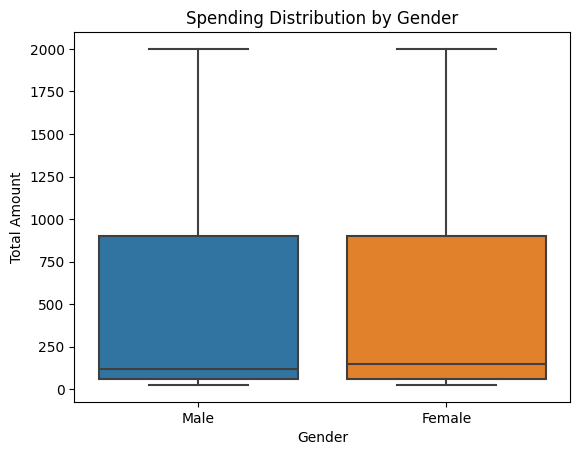

In [49]:
## Distribution of Spending 

sns.boxplot(data=df, x='Gender', y='Total Amount')
plt.title("Spending Distribution by Gender")
plt.show()
